# Historic Real Estate Calculator
This calculator compares median home prices from 2000-present for any city in the USA.  

The next implementations will be the ability to compare neighborhoods, zip codes, and counties.   

Initial output will be mostly graphs, similar to comparing stocks.  

Additionally, I would like to add in more metrics like exact percent change,  
and the ability to set time windows (although this data only has 20 years,  
so shorter timescales may provide little value).  

Would like data going back further in time, with the at least the same frequency of monthly reporting.  

The current dataset is about 40MB.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def select_state(df, StateName, RegionName=None):
    '''Use this function to choose your state / filter the dataframe'''

    is_state = df['StateName'] == StateName
    state_df = df[is_state]

    # Transpose only occurs if RegionName is provided (why?)
    if RegionName:
        region = state_df['RegionName'] == RegionName
        filtered = state_df[region].T
        filtered.columns = [f'{RegionName}']
        return filtered

    return state_df

# pay attention to .T method, transposing 
# dataframes in the correct order matters here

def get_city(df, RegionName):
    '''Un-needed for now, could be adjusted to select 
    all cities in the US with a given name'''
    
    new_df = df.loc[df['RegionName'] == RegionName].T
    new_df.columns = [f'{RegionName}']
    
    return new_df[8:]

In [3]:
# Loads remote data from my repo `realestate-calc`
path = 'raw-data/City_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv'
df = pd.read_csv(path)

In [4]:
# Would really like to include population and other data here. 
# Could be incredible to make decisions about school, 
# demographics, median income, etc.

yucaipa = select_state(df, 'CA', 'Yucaipa')
newport = select_state(df, 'CA', 'Newport Beach')
nipomo = select_state(df, 'CA', 'Nipomo')
huntington = select_state(df, 'CA', 'Huntington Beach')
fort_worth = select_state(df, 'TX', 'Fort Worth')

In [5]:
merge_1 = pd.merge(yucaipa, newport, left_index=True, right_index=True)

merge_2 = pd.merge(merge_1, nipomo, left_index=True, right_index=True)

merge_3 = pd.merge(merge_2, huntington, left_index=True, right_index=True)

final_merge = pd.merge(merge_3, fort_worth, left_index=True, right_index=True)

In [6]:
final_merge

,Yucaipa,Newport Beach,Nipomo,Huntington Beach,Fort Worth
RegionID,21417,53571,9020,25218,18172
SizeRank,1024,501,3022,146,16
RegionName,Yucaipa,Newport Beach,Nipomo,Huntington Beach,Fort Worth
RegionType,City,City,City,City,City
StateName,CA,CA,CA,CA,TX
...,...,...,...,...,...
2021-12-31,519956.0,3414561.0,827398.0,1228925.0,292703.0
2022-01-31,527650.0,3503171.0,842995.0,1259719.0,298498.0
2022-02-28,536020.0,3577014.0,857491.0,1287460.0,305805.0
2022-03-31,542970.0,3655733.0,874780.0,1317280.0,312684.0


<AxesSubplot:>

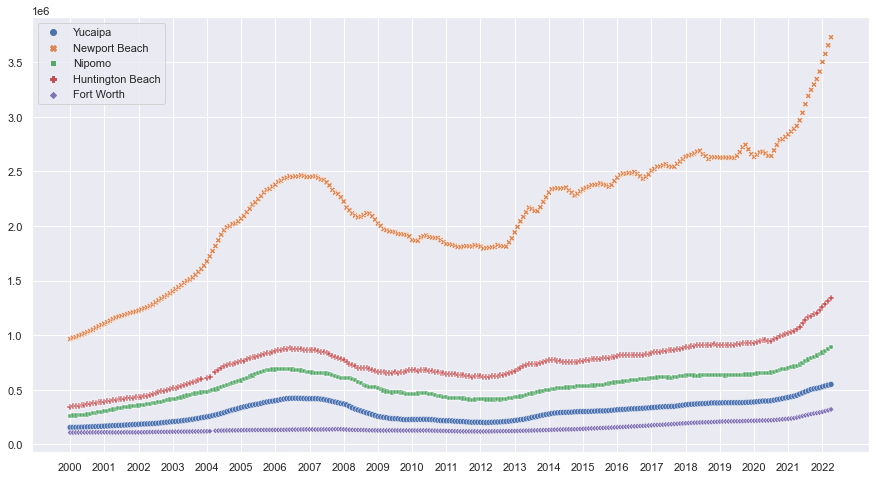

In [7]:
plt.figure(figsize=(15,8));
sns.set_theme()
# sns.set_style('whitegrid')
# output = sns.scatterplot(x=ca.index, y = ca.T.loc["Newport Beach"]);
plt.xticks(range(0, 267, (267//21)), range(2000, 2023, 1));
sns.scatterplot(data=final_merge[8:], style=None)


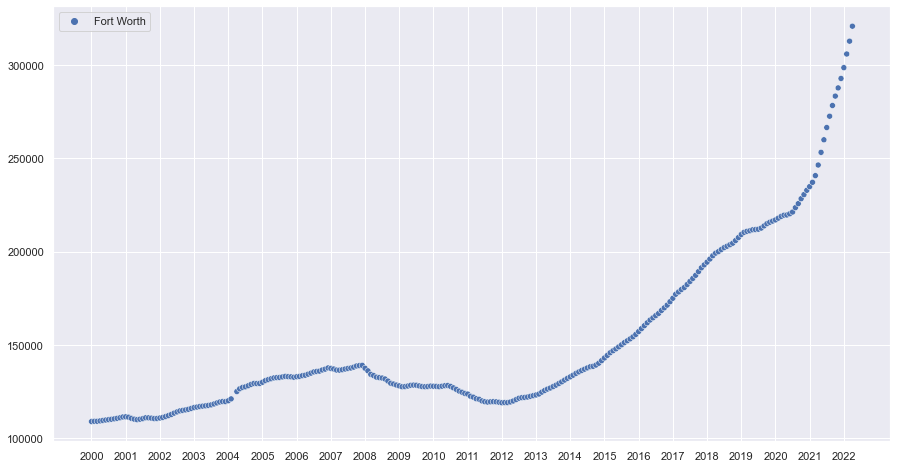

In [8]:
# formatting
plt.figure(figsize=(15,8));
sns.set_theme()
plt.xticks(range(0, 267, (267//21)), range(2000, 2023, 1))

# plot
sns.scatterplot(data=select_state(df, 'TX', 'Fort Worth')[8:]);

In [9]:
c = select_state(df, 'PA', 'Chalfont')
s = select_state(df, 'PA', 'Schwenksville')
l = select_state(df, 'PA', 'Langhorne')
y = select_state(df, 'PA', 'Yardley')

In [10]:
one = pd.merge(c, s, left_index=True, right_index=True)
two = pd.merge(one, l, left_index=True, right_index=True)
three = pd.merge(two, y, left_index=True, right_index=True)

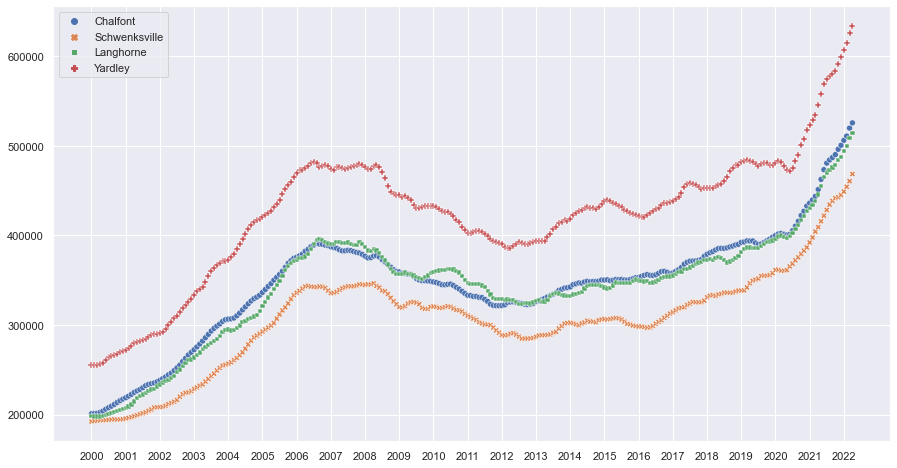

In [11]:
# formatting
plt.figure(figsize=(15,8));
sns.set_theme()
plt.xticks(range(0, 267, (267//21)), range(2000, 2023, 1))

# plot
sns.scatterplot(data=three[8:]);

### Missing Data

We can see in the `df.tail()` call below that some of the smaller cities contain many NaN values. This is most commonly due to missing data in the early years. The amount of missing data also varies. This shouldn't effect the usefulness of the calculator for major cities. The zipcode and neighborhood Zillow datasets may contain records for cities not listed in the city dataset. Smaller cities also lack `Metro` values.

In [12]:
df.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30
22395,213097,29449,McAlisterville,City,PA,PA,NaN,Juniata County,NaN,NaN,...,183061.0,183964.0,184928.0,185475.0,186081.0,188933.0,192310.0,195154.0,196032.0,196553.0
22396,5617,29449,Letts,City,IA,IA,NaN,Louisa County,NaN,NaN,...,98542.0,98703.0,99093.0,99275.0,100189.0,101569.0,103132.0,104460.0,104906.0,104882.0
22397,5873,29449,McGuffey,City,OH,OH,NaN,Hardin County,NaN,NaN,...,57766.0,58415.0,58587.0,59053.0,59073.0,58833.0,58336.0,58099.0,58314.0,58732.0
22398,4128,29449,Cleveland,City,VA,VA,NaN,Russell County,NaN,NaN,...,38419.0,38829.0,38858.0,38628.0,38622.0,38893.0,39518.0,39990.0,40357.0,40301.0
22399,48272,29449,Villard,City,MN,MN,NaN,Pope County,NaN,NaN,...,114623.0,116404.0,117969.0,119597.0,120801.0,122609.0,124021.0,124835.0,124878.0,124728.0
